# RSAM vs DSAR

In [1]:
import numpy as np
import pandas as pd
import obspy.signal.filter
import datetime
import scipy
import matplotlib.pyplot as plt

In [2]:
def mask_df(row):
    peaks, properties = scipy.signal.find_peaks(row, prominence=(row.rolling('10D').median()*100).to_numpy(), distance=len(row))
    row_masked = row.copy()
    try:
#         row_masked[row_masked>min(row_masked.iloc[properties['left_bases'][0]:properties['right_bases'][0]])]=np.nan
        row_masked.iloc[properties['left_bases'][0]-500:properties['right_bases'][0]+500]=np.nan
    except:
        pass
    return row_masked

In [3]:
sta = 'allUWsta' # allUWsta, YEL_VALT
# read seismic data -------------------------------------------------------------------------------------------------------------------
# df = pd.read_csv('../data/1980_{}_extended2.csv'.format(sta)) # 1 year long
df = pd.read_csv('../data/{}_extended2_long2.csv'.format(sta))
df.set_index('time',inplace=True)
df.index = pd.to_datetime(df.index).tz_localize(None)
df_read = df.resample('10min').median()

In [4]:
def head_and_tail(df, n=2): # function to show rows from the beginning and end of the df
    return pd.concat([df.head(n), df.tail(n)])

head_and_tail(df)

,rsam,mf,hf,dsar,ldsar,vsar,rms,rmes,pgv,pga,...,zsc2_ldsar,zsc2_vsar,zsc2_rms,zsc2_rmes,zsc2_pgv,zsc2_pga,lhdsar,lhvsar,zsc2_lhdsar,zsc2_lhvsar
time,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 23:40:00,8.129698,11.363140,20.637913,1.403804,1.879541,0.666528,3.279763e-07,2.052415e-07,1.469808e-06,0.000122,...,0.726137,4.848894,0.603515,0.615680,0.657761,0.423246,2.726442,0.714780,1.454453,2.194831
2022-12-31 23:50:00,3.927294,6.949612,13.281453,1.103715,1.118566,0.574990,1.165115e-07,5.650548e-08,6.269962e-07,0.000029,...,0.508880,4.595204,0.048988,0.032803,0.063107,0.040983,1.350959,0.374586,0.835660,1.885521


In [247]:
# preprocess seismic data -------------------------------------------------------------------------------------------------------------------
df = df_read.copy()
df = df.apply(mask_df,axis=0) # remove outliers (the peak detection does not work well)

df_roll = df.rolling('30D').median()
# df = df.rolling('1H').median()
# df = df.rolling('6H', center=True, closed='both').median()
# df = df[df.index<datetime.datetime(year,5,22)]

## Plotting

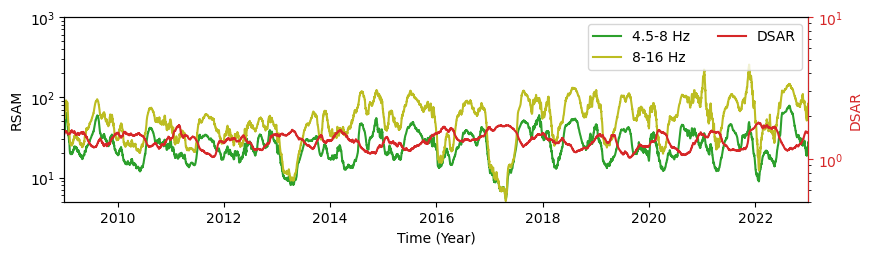

In [222]:
# crate figure lake level--------------------------------------------------------------------------------------------------------------------------
fig, ax1 = plt.subplots(1,1, figsize=(6.4*1.5, 4.8*0.5))

# start plototting seismic data ---------------------------------------------------------------------------------------------------------
# ax1.plot(df['rsam'], label='2-5 Hz', alpha=1)
ax1.plot(df_roll['mf'], label='4.5-8 Hz', alpha=1, color='C2')
ax1.plot(df_roll['hf'], label='8-16 Hz', alpha=1, color='C8')
ax1.plot(np.nan, label='DSAR', alpha=1, color='C3')

ax2 = ax1.twinx()
ax2.plot(df_roll['dsar'], label='DSAR', alpha=1, color='C3')
# ax2.plot(df_roll['mf']/df_roll['hf'], alpha=1, color='k')

# color ticks and spines
ax2.spines['right'].set_color('C3')
ax2.xaxis.label.set_color('C3')
ax2.tick_params(axis='y', colors='C3')

# plot dome periodes -----------------------------------------------------------------------------------------------------------------
sdate = datetime.datetime(2004,10,11)
edate = datetime.datetime(2008,2,1)
ax2.axvspan(sdate, edate, alpha=0.2, color='gray')
    
# title, legende, and scale ------------------------------------------------------------------------------------------------------------
# ax1.set_title('Station {}'.format(sta))
# ax1.legend(loc='center left')
ax1.legend(loc='upper right', ncol=2)

# linear y-axis
# ax1.set_ylabel('RSAM')
# ax1.set_ylim(0.,200)
# ax2.set_ylabel('DSAR', color='C3')
# ax2.set_ylim(0.5,3.5)

# log y-axis
ax1.set_yscale('log')
ax1.set_ylabel('RSAM')
ax1.set_ylim(5e0,1e3)
ax2.set_yscale('log')
ax2.set_ylabel('DSAR', color='C3')
ax2.set_ylim(5e-1,1e1)

ax1.set_xlabel('Time (Year)')
# ax1.set_xlim(df_roll.index[0], df_roll.index[-1])
ax1.set_xlim(datetime.datetime(2009,1,1), datetime.datetime(2023,1,1))

# save plot and show -----------------------------------------------------------------------------------------------------------------
# plt.savefig('../plots/multiyear/multi_sta/RSAMvsDSAR_{}_log_long_dome_roll30D_final1.png'.format(sta), dpi=300, bbox_inches='tight')
fig.show()


Text(0, 0.5, 'log(DSAR)')

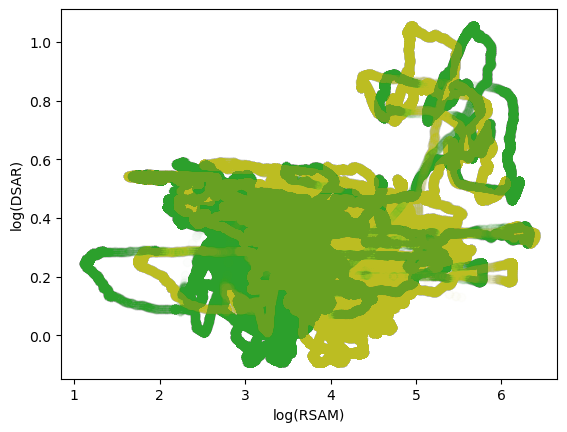

In [126]:
plt.scatter(np.log(df['mf']),np.log(df['dsar']), color='C2', alpha=0.01)
plt.scatter(np.log(df['hf']),np.log(df['dsar']), color='C8', alpha=0.01)
plt.xlabel('log(RSAM)')
plt.ylabel('log(DSAR)')

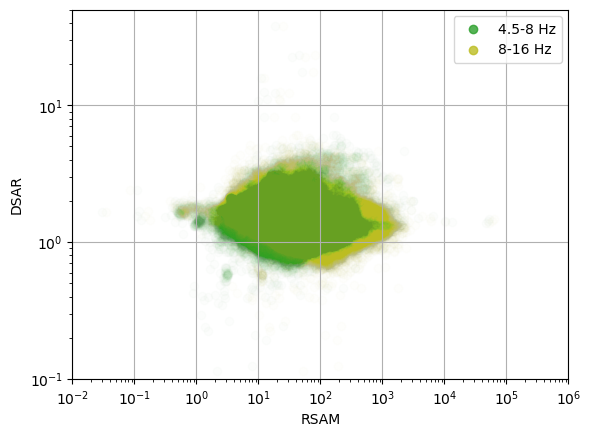

In [199]:
df = df.loc[datetime.datetime(2009,1,1):]
plt.scatter(df['mf'],df['dsar'], color='C2', alpha=0.01)
plt.scatter(df['hf'],df['dsar'], color='C8', alpha=0.01)
plt.scatter(np.nan,np.nan, color='C2', alpha=0.8, label='4.5-8 Hz')
plt.scatter(np.nan,np.nan, color='C8', alpha=0.8, label='8-16 Hz')
plt.xlim(1e-2,1e6)
plt.ylim(1e-1,5e1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RSAM')
plt.ylabel('DSAR')
plt.grid()
plt.legend(loc='upper right')
# plt.savefig('../plots/multiyear/multi_sta/RSAMvsDSAR_{}_scatter.png'.format(sta), dpi=300, bbox_inches='tight')


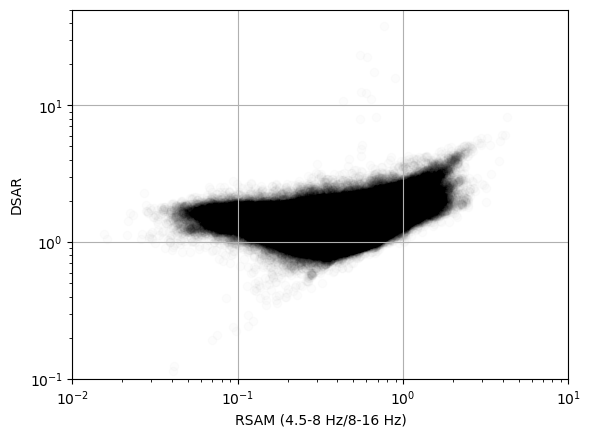

In [173]:
df = df.loc[datetime.datetime(2009,1,1):]
plt.scatter(df['mf']/df['hf'],df['dsar'], color='k', alpha=0.01)
plt.xlim(1e-2,1e1)
plt.ylim(1e-1,5e1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RSAM (4.5-8 Hz/8-16 Hz)')
plt.ylabel('DSAR')
plt.grid()
# plt.savefig('../plots/multiyear/multi_sta/RSAMvsDSAR_{}_scatter2.png'.format(sta), dpi=300, bbox_inches='tight')


# Spectral width vs DSAR

In [5]:
import glob
import sys
from obspy import UTCDateTime

In [6]:
#================================================ define parameters =============================================================
preprocessing_type = 'OBS'
years = range(2002,2013+1)
jdays = range(1,366+1)
# signal_duration_sec = 24 * 3600 # hour * sec

window_duration_sec = 30
average = 60

file_list = []
for year in years:
    for jday in jdays:
        file = glob.glob('/data/*/data_manuela/MtStHelens/covariance/{}/{:03d}/{}*wd{}_av{}.npz'
                         .format(year,jday,preprocessing_type,window_duration_sec,average))
        if len(file)>0:
            file_list.append(file[0])
file_list

['/data/whd02/data_manuela/MtStHelens/covariance/2002/001/OBS_2002_001_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covariance/2002/002/OBS_2002_002_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covariance/2002/003/OBS_2002_003_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covariance/2002/004/OBS_2002_004_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covariance/2002/005/OBS_2002_005_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covariance/2002/006/OBS_2002_006_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covariance/2002/007/OBS_2002_007_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covariance/2002/008/OBS_2002_008_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covariance/2002/009/OBS_2002_009_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covariance/2002/010/OBS_2002_010_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covariance/2002/011/OBS_2002_011_wd30_av60.npz',
 '/data/whd02/data_manuela/MtStHelens/covar

In [7]:
# load frequencies (y-ticks)
frequencies = np.load(file_list[0], allow_pickle=True)['frequencies']

#  initialize all the arrays
UTC_times = np.full((len(file_list)), np.nan)
spectral_width = np.full((len(file_list)-1, frequencies.shape[0]-1), np.nan) # must be one element smaller in each direction
n_sta = np.full((len(file_list)), np.nan)

In [8]:
for i, file in enumerate(file_list):
    

    ar = np.load(file, allow_pickle=True)

    # load the different parameters
    UTC_times_day = ar['UTC_times'][0]
    spectral_width_day = np.mean(ar['spectral_width'], axis=0)/ar['n_sta']
    n_sta_day = ar['n_sta']

    if spectral_width_day.shape[0] < spectral_width.shape[1]: # if freq too short
        spectral_width_day = np.concatenate((spectral_width_day,
                                              np.full((spectral_width.shape[1]-spectral_width_day.shape[0]),
                                                      np.nan))) # fill the missing positions with nan

    # fill parameters into inizalized arrays
    UTC_times[i] = UTC_times_day
    n_sta[i] = n_sta_day

    if i < len(file_list)-1:
        spectral_width[i,:] = spectral_width_day

    sys.stdout.write('\r{} of {}'.format(i+1, len(file_list)))
    sys.stdout.flush()

4374 of 4374

In [9]:
len(UTC_times), spectral_width.shape, frequencies.shape

(4374, (4373, 5999), (6000,))

In [10]:
UTC_times = [UTCDateTime(t).datetime for t in UTC_times]

## Spectral Width Time Series

In [12]:
# lower_freq = [0.1,1.,5.,10.] # lower frequency limit
# upper_freq = [0.5,2.,6.,11.] # upper frequency limit

lower_freq = [2,4.5,8] # lower frequency limit
upper_freq = [5,8,16] # upper frequency limit

# lower_freq = np.arange(20,50,5).round(1) # lower frequency limit
# upper_freq = np.arange(25,55,5).round(1) # upper frequency limit

df_eig = pd.DataFrame()
# df_eig['UTC'] = [(i+((times[1]-times[0])/2)) for i in times[:-1]] # to center time in bin
df_eig['UTC'] = [(i+((UTC_times[1]-UTC_times[0])/2)) for i in UTC_times[:-1]] # to center time in bin
df_eig = df_eig.set_index('UTC')

for low, up in zip(lower_freq,upper_freq):
    idx = np.where(np.logical_and(frequencies>=low, frequencies<=up))[0]
    eig_selected_freq = spectral_width[:,idx[0]:idx[-1]] # first time than frequency
    eig_merge = np.mean(eig_selected_freq, axis=1)
    df_eig['frequ{}_{}'.format(low,up)] = eig_merge
df_eig

,frequ2_5,frequ4.5_8,frequ8_16
UTC,,,
2002-01-01 12:00:00,0.329853,0.327850,0.332471
2002-01-02 12:00:00,0.327740,0.329590,0.331674
2002-01-03 12:00:00,0.323479,0.327097,0.331763
2002-01-04 12:00:00,0.313615,0.321814,0.326549
2002-01-05 12:00:00,0.290728,0.296518,0.297924
...,...,...,...
2013-12-26 12:00:00,0.311164,0.321557,0.325503
2013-12-27 12:00:00,0.315479,0.316561,0.324862
2013-12-28 12:00:00,0.297533,0.312771,0.324774


In [224]:
# df_eig_roll = df_eig.rolling('1H').median()#, center=True
df_eig_roll = df_eig.rolling('30D').median()#, center=True
df_eig_roll

,frequ2_5,frequ4.5_8,frequ8_16
UTC,,,
2002-01-01 12:00:00,0.329853,0.327850,0.332471
2002-01-02 12:00:00,0.328796,0.328720,0.332073
2002-01-03 12:00:00,0.327740,0.327850,0.331763
2002-01-04 12:00:00,0.325609,0.327474,0.331719
2002-01-05 12:00:00,0.323479,0.327097,0.331674
...,...,...,...
2013-12-26 12:00:00,0.312015,0.314330,0.325900
2013-12-27 12:00:00,0.312213,0.315189,0.325900
2013-12-28 12:00:00,0.312015,0.314330,0.325763


## Plotting

Text(0, 0.5, 'Frequency (Hz)')

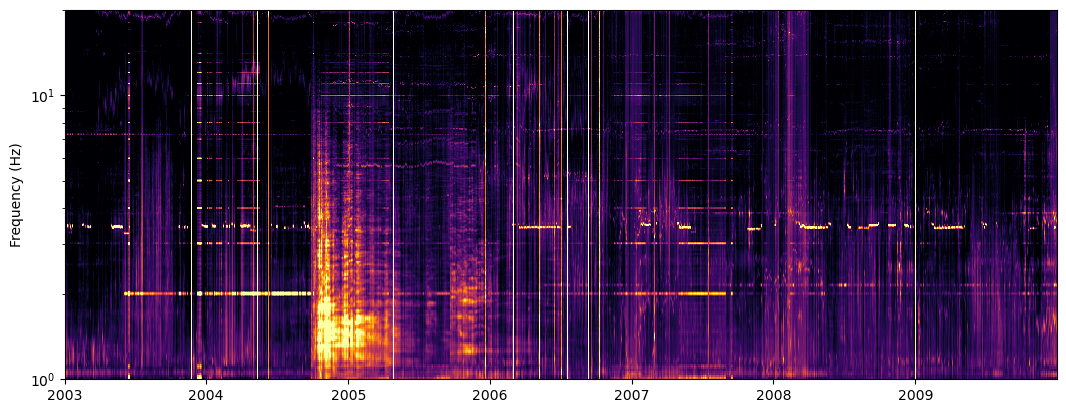

In [65]:
# plt.rcParams.update({'font.size': 12})
fig, ax2 = plt.subplots(figsize=(6.4*2, 4.8))
img = ax2.pcolormesh(
    UTC_times, frequencies, spectral_width.T, rasterized=True, cmap="inferno_r",
    vmin=0.16, vmax=0.32)

# x axis
# start, end = ax2.get_xlim()
# ax2.set_xticks(np.arange(start,end+1,end/3)) # tick position
# xticks = pd.date_range(str(t.datetime.date()), periods=4, freq="7D")
# ax2.set_xticklabels([i.date() for i in xticks]) # tick labels
# ax2.set_xlabel('Time [Year-Month-Day]')

# y axis
ax2.set_yscale('log')
ax2.set_ylim([1e-0, 20]) # up to Nyquiest frequency
ax2.set_ylabel("Frequency (Hz)")

# ax2.set_title("One-bit temporal normalization")
# plt.colorbar(img, ax=ax2).set_label("norm. spectral width")
# plt.savefig('plots/years/OBS_log_{}_{}_{}_dt{}_wd{}_av{}_col.png'.format(year,jday,hour,signal_duration_sec, int(window_duration_sec), average), dpi=300, bbox_inches='tight')

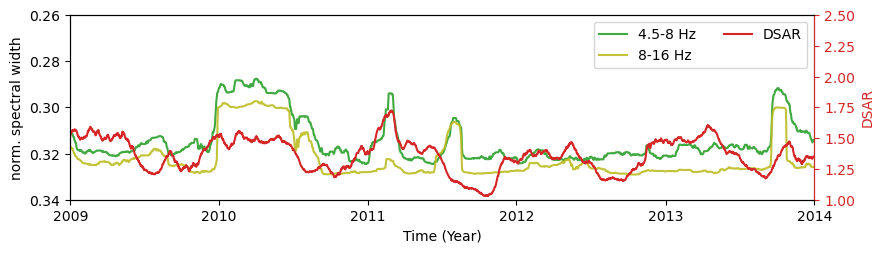

In [270]:
# plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1,1, sharex=True, figsize=(6.4*1.5,4.8*0.5))
# ax.plot(df_eig_roll.iloc[:,0], label='2-5 Hz', alpha=0.9, color='C0')
ax.plot(df_eig_roll.iloc[:,1], label='4.5-8 Hz', alpha=0.9, color='C2')
ax.plot(df_eig_roll.iloc[:,2], label='8-16 Hz', alpha=0.9, color='C8')
ax.plot(np.nan, label='DSAR', alpha=1, color='C3')

ax2 = ax.twinx()
ax2.plot(df_roll['dsar'], label='DSAR', alpha=1, color='C3')

sdate = datetime.datetime(2004,10,11)
edate = datetime.datetime(2008,2,1)
ax.axvspan(sdate, edate, alpha=0.2, color='gray')

ax.set_xlabel('Time (Year)')
ax.set_xlim(datetime.datetime(2009,1,1),datetime.datetime(2014,1,1))

# color ticks and spines
ax2.spines['right'].set_color('C3')
ax2.xaxis.label.set_color('C3')
ax2.tick_params(axis='y', colors='C3')

ax.set_ylim(0.26,0.34)
ax.set_ylabel("norm. spectral width")
ax.invert_yaxis()
ax2.set_ylim(1,2.5)
ax2.set_ylabel("DSAR", color='C3')
ax.legend(loc='upper right', ncol=2)
# plt.savefig('../plots/multiyear/multi_sta/OBSvsDSAR_{}_log_long_dome_roll30D_final1.png'.format(sta),
#             dpi=300, bbox_inches='tight')


In [14]:
# this is not a clean way to cut the dfs to the same length
df = df.resample('1D').median()
# df = df.loc[df_eig.iloc[:,1].index[0]:df_eig.iloc[:,1].index[-1]][:-8]
df = df.loc[datetime.datetime(2009,1,1):datetime.datetime(2014,1,1)][:-2]
df_eig = df_eig[datetime.datetime(2009,1,1):datetime.datetime(2014,1,1)]
df

,rsam,mf,hf,dsar,ldsar,vsar,rms,rmes,pgv,pga,...,zsc2_ldsar,zsc2_vsar,zsc2_rms,zsc2_rmes,zsc2_pgv,zsc2_pga,lhdsar,lhvsar,zsc2_lhdsar,zsc2_lhvsar
time,,,,,,,,,,,,,,,,,,,,,
2009-01-01,171.630980,213.525334,171.974106,2.974062,1.255020,1.282488,9.851294e-07,6.366998e-07,0.000005,0.000266,...,9.089453,5.870793,6.597209,13.018547,1.360320,1.544716,3.742560,0.992888,16.419684,8.704527
2009-01-02,37.888238,50.708377,52.441143,1.563461,2.204676,0.786915,1.403524e-06,7.884554e-07,0.000011,0.001841,...,2.314097,7.947064,3.572911,5.604183,2.524728,3.564822,3.191796,0.787475,3.179327,3.666252
2009-01-03,18.007568,16.687527,22.393456,1.452672,2.740800,0.707307,1.440939e-06,8.155939e-07,0.000011,0.001872,...,3.022772,5.143622,3.219420,3.644702,2.583532,3.709064,3.744129,0.858709,3.668852,3.607905
2009-01-04,21.986972,25.239242,29.228035,1.426249,2.400883,0.695108,1.604963e-06,8.852437e-07,0.000013,0.002102,...,2.215801,6.831959,3.627322,4.160421,3.123980,4.709080,3.223966,0.797236,3.384020,4.335771
2009-01-05,176.368487,173.913639,194.437504,1.511266,2.414131,0.722391,1.943388e-05,1.192437e-05,0.000101,0.014172,...,2.050562,19.364300,298.810951,928.575000,90.987035,112.946604,3.208838,0.776273,10.018022,14.636226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-26,9.124706,12.987014,21.819276,1.272244,1.936053,0.627658,5.576252e-07,3.868508e-07,0.000003,0.000333,...,0.514566,5.755101,1.861767,2.314895,1.652775,2.215829,2.408302,0.608601,1.152698,1.884642
2013-12-27,12.054647,16.192052,22.401275,1.365946,1.940533,0.680989,6.040706e-07,4.059049e-07,0.000003,0.000374,...,0.509612,6.711483,2.099874,2.580319,1.688872,2.657430,2.673588,0.678364,1.294394,2.086382
2013-12-28,14.688173,15.356177,23.339330,1.390242,2.086412,0.679226,5.749147e-07,3.885183e-07,0.000003,0.000316,...,0.861267,8.122536,1.857089,2.299887,1.453352,1.815676,2.842674,0.728386,1.751924,3.339591


In [253]:
df_eig

,frequ2_5,frequ4.5_8,frequ8_16
UTC,,,
2009-01-01 12:00:00,0.000000,0.000000,0.000000
2009-01-02 12:00:00,0.000000,0.000000,0.000000
2009-01-03 12:00:00,0.312943,0.320204,0.326640
2009-01-04 12:00:00,0.310854,0.320784,0.325161
2009-01-05 12:00:00,0.318103,0.321766,0.323092
...,...,...,...
2013-12-26 12:00:00,0.311164,0.321557,0.325503
2013-12-27 12:00:00,0.315479,0.316561,0.324862
2013-12-28 12:00:00,0.297533,0.312771,0.324774


Text(0, 0.5, 'log(DSAR)')

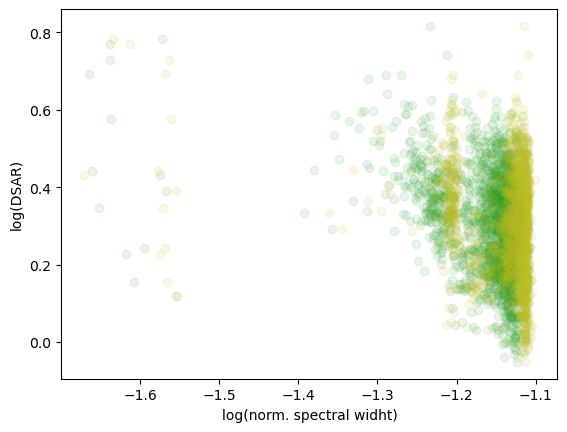

In [255]:
plt.scatter(np.log(df_eig.iloc[:,1]),np.log(df['dsar']),color='C2', alpha=0.1)
plt.scatter(np.log(df_eig.iloc[:,2]),np.log(df['dsar']),color='C8', alpha=0.1)
plt.xlabel('log(norm. spectral widht)')
plt.ylabel('log(DSAR)')


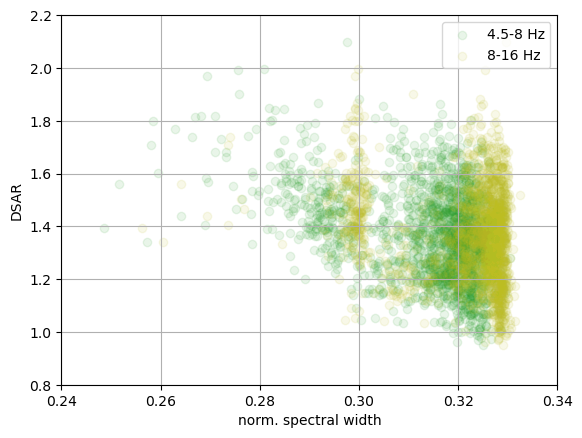

In [16]:
plt.scatter(df_eig.iloc[:,1],df['dsar'],label='4.5-8 Hz',color='C2', alpha=0.1)
plt.scatter(df_eig.iloc[:,2],df['dsar'],label='8-16 Hz',color='C8', alpha=0.1)
plt.xlim(0.24,0.34)
plt.ylim(0.8,2.2)
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.xlabel('norm. spectral width')
plt.ylabel('DSAR')
plt.legend(loc='upper right')
# plt.savefig('../plots/multiyear/multi_sta/OBSvsDSAR_{}_scatter3.png'.format(sta), dpi=300, bbox_inches='tight')



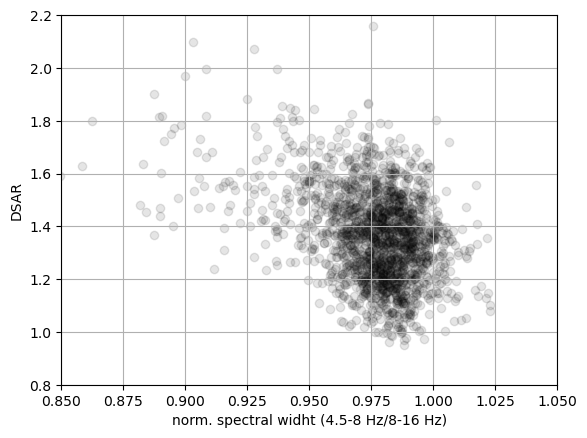

In [279]:
plt.scatter(df_eig.iloc[:,1]/df_eig.iloc[:,2],df['dsar'],color='k', alpha=0.1)
plt.xlim(0.85,1.05)
plt.ylim(0.8,2.2)
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.xlabel('norm. spectral widht (4.5-8 Hz/8-16 Hz)')
plt.ylabel('DSAR')
# plt.savefig('../plots/multiyear/multi_sta/OBSvsDSAR_{}_scatter2.png'.format(sta), dpi=300, bbox_inches='tight')



In [110]:
df_eig

,frequ2_5,frequ4.5_8,frequ8_16
UTC,,,
2003-01-01 12:00:00,0.320356,0.325861,0.330240
2003-01-02 12:00:00,0.319341,0.325637,0.330934
2003-01-03 12:00:00,0.318725,0.325972,0.331023
2003-01-04 12:00:00,0.317353,0.328249,0.331926
2003-01-05 12:00:00,0.317222,0.327964,0.331588
...,...,...,...
2010-12-26 12:00:00,0.319839,0.325217,0.327824
2010-12-27 12:00:00,0.317916,0.315143,0.328136
2010-12-28 12:00:00,0.318483,0.323736,0.328323
